**Цели и задачи**

Подготовить данные к обработке

Определить, какой характерный срок жизни платформы и сделать выборку актуальных данных

Выяснить, какие существуют различия между площадками и выделить самые перспективные площадки для вложения 

Составить характеристику для каждого региона

Исследовать влияние рейтингов критиков и пользователей игры на её продажи

Сравнить рейтинги платформ PC и XBox One и жанров игр Action и Sports

# Step 2

Reading the database

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')

Review overall data info

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Step 3

## Casting to one case

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Data types and data gap processing

Checking the corectness of data types

user_score -- quantitative characteristic of the game, change its type to float64.

Except for 'NaN' in data['user_score'] there are 'tbd' -- 'to be deleted', they should be changed to 'NaN' -- adding errors parameter to_numeric() method

In [5]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Change data type of year_of_release to int (год может быть только целым числом)

In [6]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

In [7]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
21.0      1
13.0      1
17.0      1
Name: critic_score, Length: 81, dtype: int64

In [8]:
data['user_score'].value_counts()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

In [9]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

The ratings of critics and users varies lot, so filling in the gaps with average values ​​will greatly distort the data for analyzing the dependence of game characteristics on the rating. To prevent such distortion, we leave the gaps blank.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Remove duplicates

In [11]:
data = data.drop_duplicates()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Total sales

Calculate total sales by region

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Step 4

### Game releases by years

In [14]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Until 1993, less than 50 games were released each year, and the number of games released did not differ much from year to year. In 1994, the number of released games doubled from the previous year. Apparently something happened in the video game market around 1994, so we will consider only these values.

Building a graph of the distribution of the number of released games by years

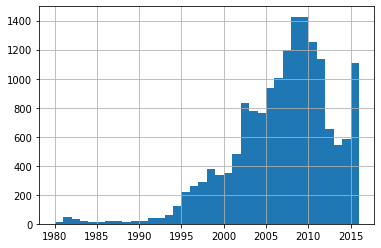

In [15]:
data['year_of_release'].hist(bins=range(1980, 2017))

### The prevalence of games on different platforms

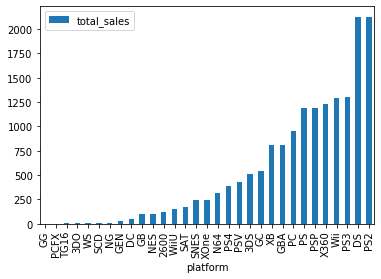

In [16]:
data.loc[:, ['platform', 'total_sales']].groupby('platform').count().sort_values('total_sales').plot(y='total_sales', kind='bar')

### Charts of released games for the most popular platforms

Plotting the dependence of the number of released games per year on time for the five most popular platforms

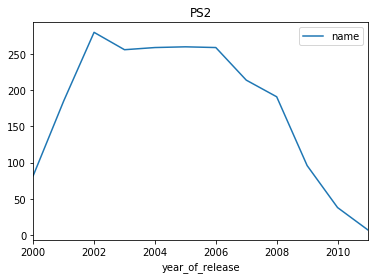

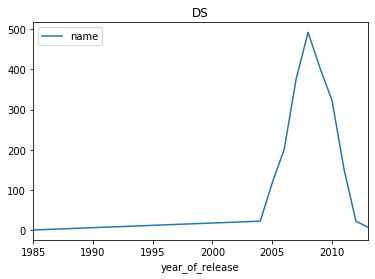

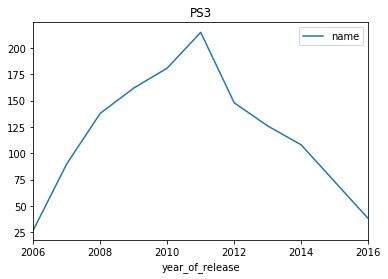

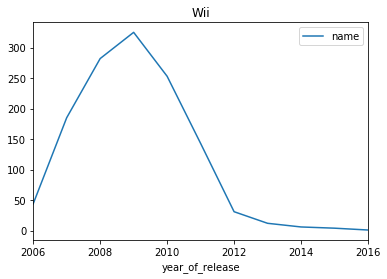

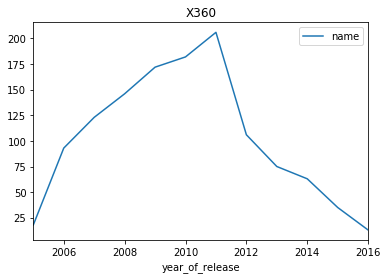

In [17]:
for platform in data['platform'].value_counts().head(5).index:
    data.loc[data['platform'] == platform].groupby(['year_of_release']).count().plot(y='name', title=platform)

Wii stands out among the platforms

In 2016, only one game was released for her.
The graphs show that the platform becomes obsolete in 10 years, therefore, in order to obtain relevant results, you need to take data for games that were released no earlier than 2011, since the most popular sites for 2016 appeared no earlier than 2011 (5 years before)

In [18]:
data = data.query('year_of_release > 2010')

Finging the leading sites in terms of sales for 2011-2016

In [19]:
data.loc[:, ['platform', 'total_sales']].groupby('platform').sum().sort_values('total_sales', ascending=False)

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Determine sales growth across all platforms

In [20]:
total_sales_2015 = data.query('year_of_release == 2015').loc[:, ['platform', 'total_sales']].groupby('platform').sum()
total_sales_2016 = data.query('year_of_release == 2016').loc[:, ['platform', 'total_sales']].groupby('platform').sum()
total_sales_2016 - total_sales_2015

,total_sales
platform,
3DS,-12.64
PC,-3.27
PS3,-13.22
PS4,-49.65
PSP,NaN
PSV,-2.00
Wii,-0.96
WiiU,-11.75
X360,-10.44


In 2016, sales on all platforms fell -- compare it to how the number of games released per year has changed

In [21]:
total_games_2015 = data.query('year_of_release == 2015').loc[:, ['platform', 'total_sales']].groupby('platform').count()
total_games_2016 = data.query('year_of_release == 2016').loc[:, ['platform', 'total_sales']].groupby('platform').count()
(total_games_2016 - total_games_2015).sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,27.0
XOne,7.0
PC,4.0
Wii,-3.0
WiiU,-14.0
X360,-22.0
PSV,-25.0
PS3,-35.0
3DS,-40.0


Попробуем предсказать продажи на 2017 год. Определим какие продажи будут на разных платформах, если тренды сохранятся

In [22]:
(total_sales_2016 + (total_sales_2016 - total_sales_2015)).sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,19.60
3DS,2.50
PSV,2.25
PC,1.98
Wii,-0.78
WiiU,-7.15
XOne,-7.84
X360,-8.92
PS3,-9.62


It is seen that the most profitable investment platform for 2017 is PS4, there is another candidate - PC - according to forecasts, it will be profitable in 2017 and the number of games released for PC is growing.

Build the boxplots of each platform

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


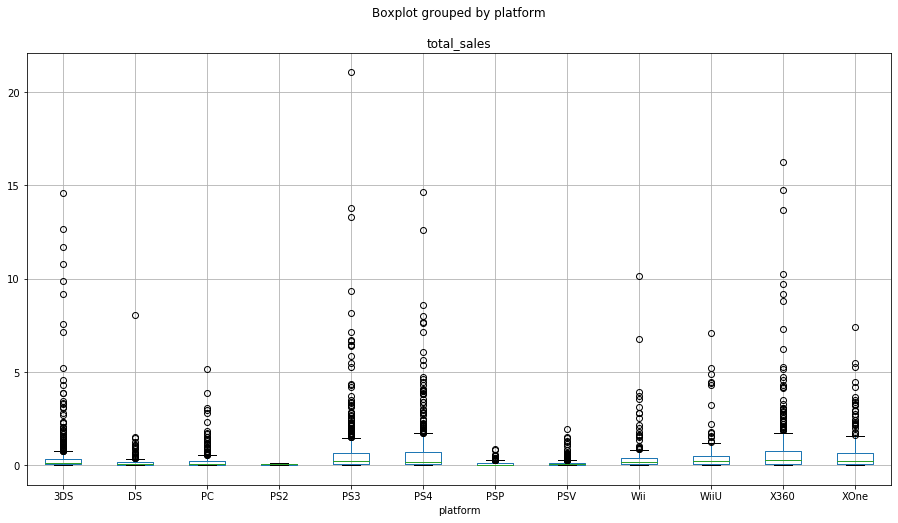

In [24]:
data.boxplot(column='total_sales', by='platform', figsize=(15, 8))

The variance in game sales for each platform is quite large, so it's worth looking at the spread of average game sales depending on the platform


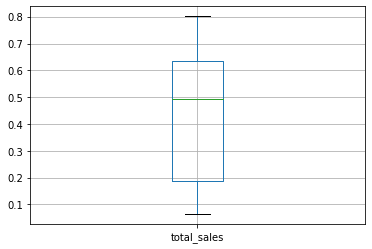

In [25]:
data.loc[:, ['platform', 'total_sales']].groupby('platform').mean().boxplot()

The spread of the average cost between the sites is not so large - the quartiles differ by more than three times, but there are no outliers


Plotting a scatterplot of the relationship between reviews and sales for PS4, our top investment candidate in 2017

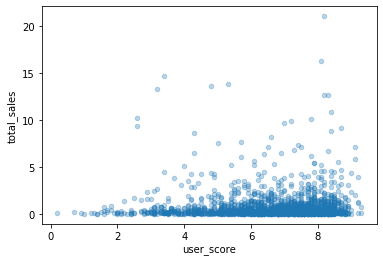

In [26]:
data.plot(x='user_score', y='total_sales', kind = 'scatter', alpha = 0.3)

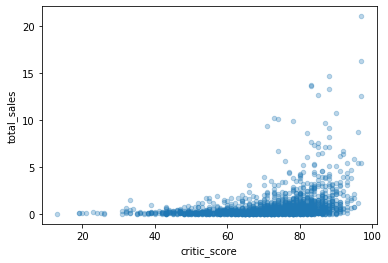

In [27]:
data.plot(x='critic_score', y='total_sales', kind = 'scatter', alpha = 0.3)

There is no strong correlation, but to make sure, we calculate the correlation coefficient

In [28]:
data['user_score'].corr(data['total_sales'])

0.03163612772559288

In [29]:
data['critic_score'].corr(data['total_sales'])

0.3299765050114585

There is no correlation between user ratings and sales.
The correlation with the critics' rating is very weak (less than 0.3).
The rating does not affect games released on the PS4 platform, it is highly unlikely that it will affect games on other platforms

Here we analyze how game sales depend on its genre.

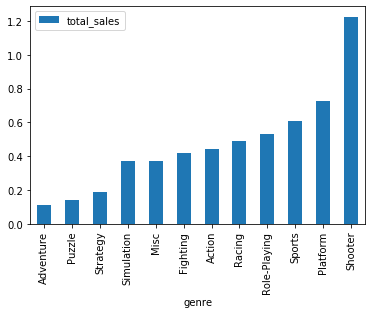

In [30]:
data.loc[:, ['genre', 'total_sales']].groupby('genre').mean().sort_values('total_sales').plot(y='total_sales', kind='bar')

It can be seen that the most profitable genre is shooter
To understand how strongly individual genres stand out, let's build a boxplot for the average cost of a game depending on the genre

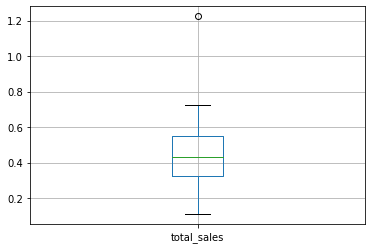

In [31]:
data.loc[:, ['genre', 'total_sales']].groupby('genre').mean().boxplot()

На диаграмме виден выброс -- это средняя выручка shooter-ов, а вот выделяющихся неприбыльных жанров нет

# Step 5

Here we study the markets of America, Japan and Europe separately. First, let's find the most popular platforms (whose earnings for 2011-2016 are the highest) in all three regions.

In [32]:
na_data = data.loc[:, ['platform', 'na_sales']].groupby('platform').sum().sort_values('na_sales', ascending=False).head()

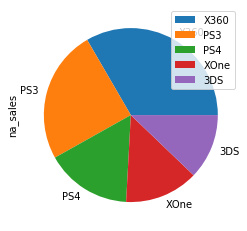

In [33]:
na_data.plot(y='na_sales', kind='pie')

In [34]:
eu_data = data.loc[:, ['platform', 'eu_sales']].groupby('platform').sum().sort_values('eu_sales', ascending=False).head()

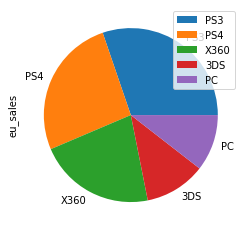

In [35]:
eu_data.plot(y='eu_sales', kind='pie')

In [36]:
jp_data = data.loc[:, ['platform', 'jp_sales']].groupby('platform').sum().sort_values('jp_sales', ascending=False).head()

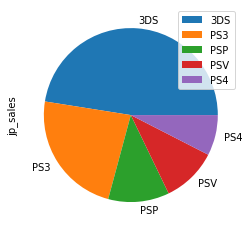

In [37]:
jp_data.plot(y='jp_sales', kind='pie')

Conclusions that can be drawn from the obtained diagrams:

The main X-box market is America, there are two models of the set-top box in the top at once, in Europe, in Japan there are no consoles from Microsoft, which is not surprising, the company is American, it sells better in the native market.

PC is mostly played in Europe.

In Japan, they play mainly on PlayStation and Nintendo - both companies are Japanese



Here we study the preferences of users of different regions in the genres of games

In [38]:
na_genre = data.loc[:, ['genre', 'na_sales']].groupby('genre').sum().sort_values('na_sales', ascending=False).head()

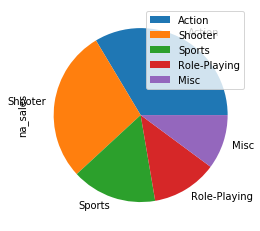

In [39]:
na_genre.plot(y='na_sales', kind='pie')

In [40]:
eu_genre = data.query('year_of_release == 2016').loc[:, ['genre', 'eu_sales']].groupby('genre').sum().sort_values('eu_sales', ascending=False).head()

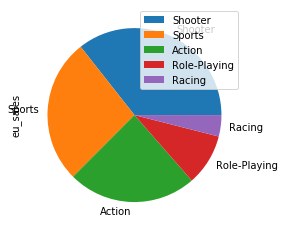

In [41]:
eu_genre.plot(y='eu_sales', kind='pie')

In [42]:
jp_genre = data.query('year_of_release == 2016').loc[:, ['genre', 'jp_sales']].groupby('genre').sum().sort_values('jp_sales', ascending=False).head()

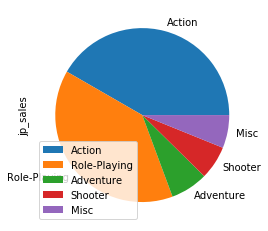

In [43]:
jp_genre.plot(y='jp_sales', kind='pie')

Conclusions:

RPG most popular in the Japanese market

Action games are popular in all regions,

Sports - only in the west

Shooters - predominantly in the west

Racing - only in Europe

## The dependence of the average cost of the game on the rating

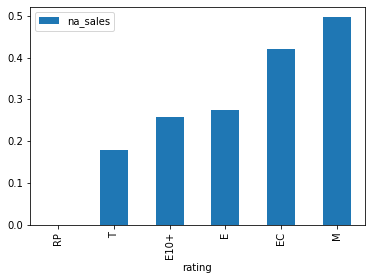

In [44]:
data.loc[:, ['rating', 'na_sales']].groupby('rating').mean().sort_values('na_sales').plot(y='na_sales', kind='bar')

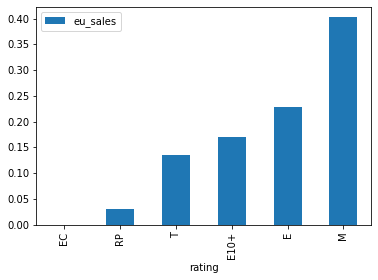

In [45]:
data.loc[:, ['rating', 'eu_sales']].groupby('rating').mean().sort_values('eu_sales').plot(y='eu_sales', kind='bar')

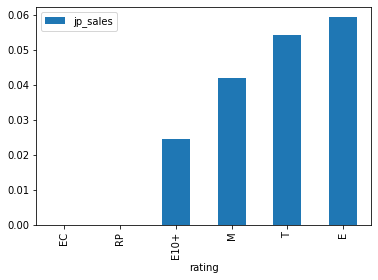

In [46]:
data.loc[:, ['rating', 'jp_sales']].groupby('rating').mean().sort_values('jp_sales').plot(y='jp_sales', kind='bar')

Conclusions:

In the West, games with an M rating are the most popular - such ratings are for games that are played by the majority of adult players

In America, EC-rated games are popular - for children from three years old. In Japan and Europe, such games are not popular. There are two possible explanations: either there are more young children in America playing video games, or children in Europe and Japan are playing something else.

In general, the charts for America and Europe are quite similar, but differ from the chart for Japan: here the most popular games are unrated: most likely it happened because games made in Japan do not always have an American rating, but they actively play in the home market

# Step 6

Here we define the parameters of the normal distribution, which approximates the reviews for each genre. For clarity, we will compile a table in which we compare the parameters of the normal distribution of user ratings and critics for each genre.

In [47]:
genre_data = pd.DataFrame(index=data['genre'].unique())
genre_data['user_mean'] = data.groupby('genre')['user_score'].mean()
genre_data['user_var'] = data.groupby('genre')['user_score'].var()
genre_data['user_std'] = data.groupby('genre')['user_score'].std()
genre_data['critic_mean'] = data.groupby('genre')['critic_score'].mean()
genre_data['critic_var'] = data.groupby('genre')['critic_score'].var()
genre_data['critic_std'] = data.groupby('genre')['critic_score'].std()

In [48]:
genre_data

,user_mean,user_var,user_std,critic_mean,critic_var,critic_std
Action,6.775904,1.811877,1.346060,69.898100,163.326969,12.779944
Shooter,6.415074,2.427337,1.557991,73.064516,170.708371,13.065541
Role-Playing,7.260952,1.514545,1.230668,73.590909,143.826719,11.992778
Racing,6.268966,2.669637,1.633902,70.919643,172.993485,13.152699
Platform,6.966667,2.775730,1.666052,74.951220,171.800060,13.107252
Misc,6.838000,1.714097,1.309235,70.136842,122.481075,11.067117
Simulation,6.219355,3.244209,1.801169,63.932203,173.478083,13.171108
Sports,5.650813,2.882510,1.697795,72.005291,238.643589,15.448093
Fighting,6.869811,1.921747,1.386271,70.520000,174.817778,13.221867
Adventure,7.401075,1.666847,1.291064,71.950000,135.187342,11.627009


Building histograms for ratings of games of various genres

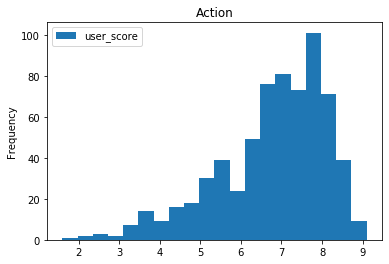

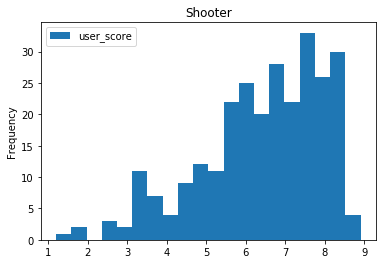

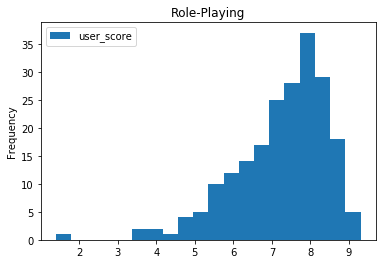

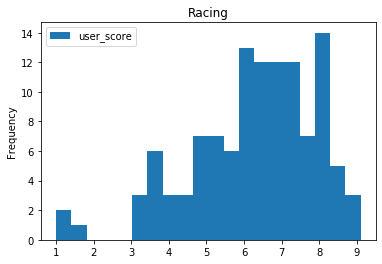

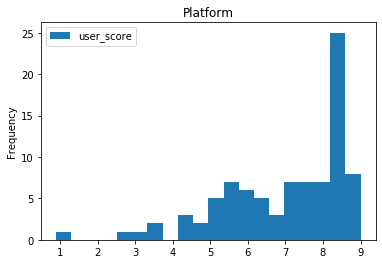

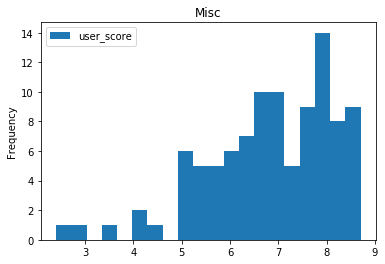

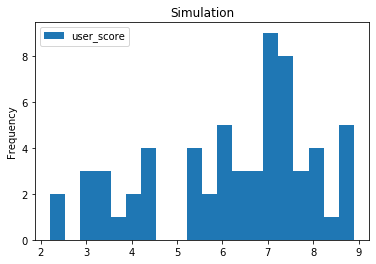

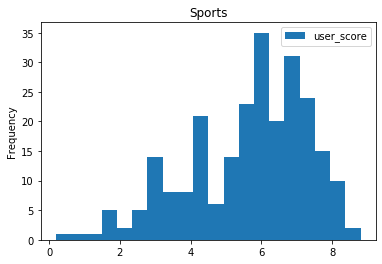

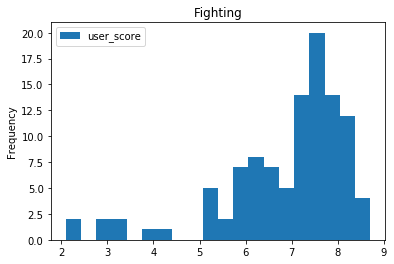

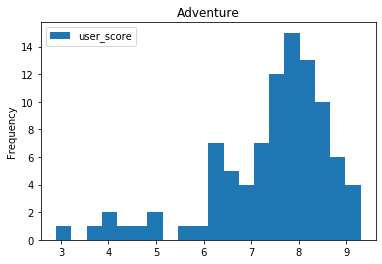

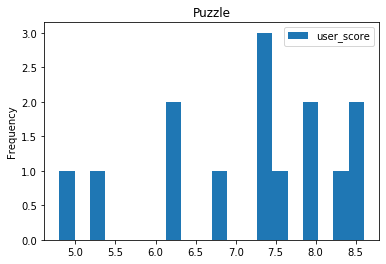

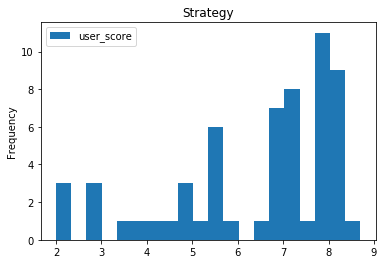

In [49]:
for genre in genre_data.index:
    data[data['genre'] == genre].plot(y='user_score', title=genre, kind='hist', bins=20)

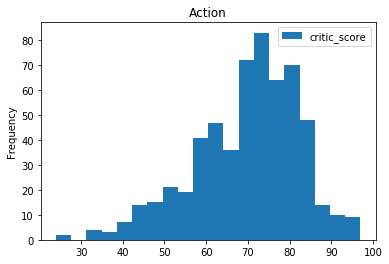

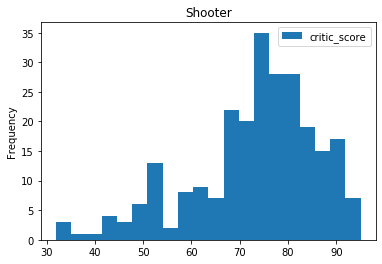

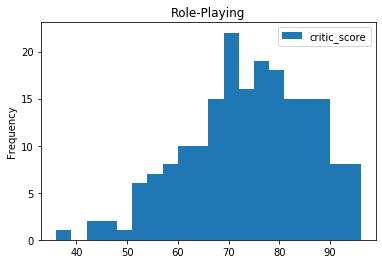

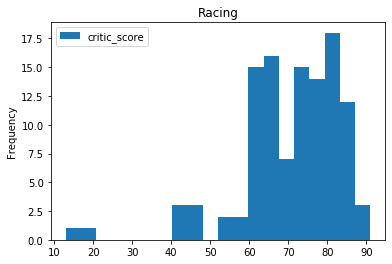

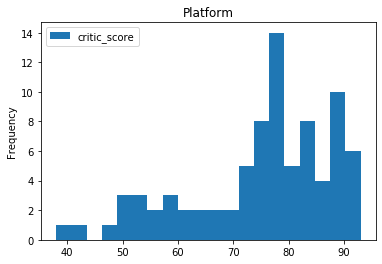

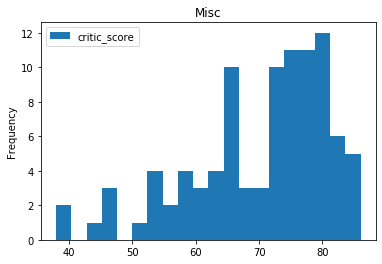

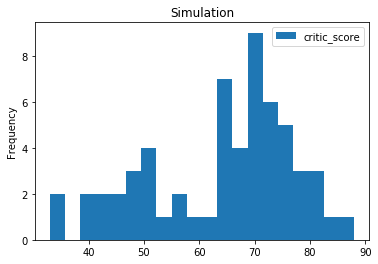

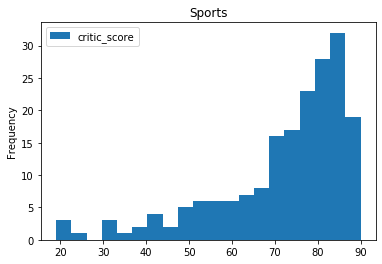

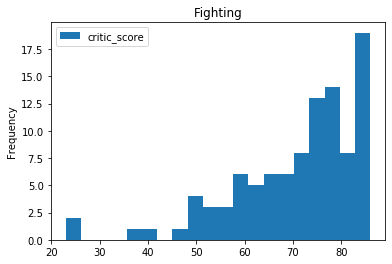

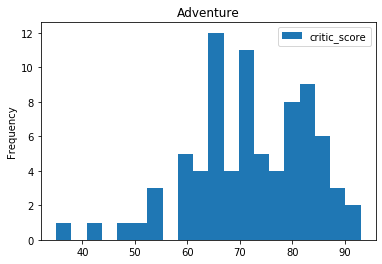

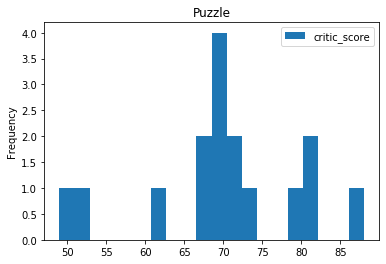

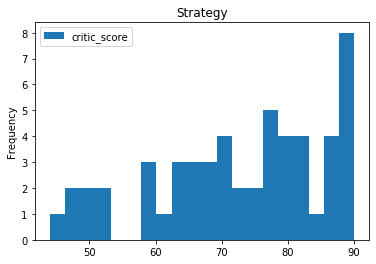

In [50]:
for genre in genre_data.index:
    data[data['genre'] == genre].plot(y='critic_score', title=genre, kind='hist', bins=20)

The histograms are quite wide, which means that the ratings of critics and users are very different.


# Шаг 7

### Xbox One and PC

Checking if the user ratings of games for Xbox One and PC are equal

Null hypothesis: ratings are equal

Alternative hypothesis: ratings are different

We believe that the ratings do not depend on each other - they mainly play on the PC in Europe, and on the Xbox One - in America, so there is no reason to believe that they are somehow connected.

In [51]:
from scipy import stats as st
alpha = 0.05 #стандартное значение
results = st.ttest_ind(data[data['platform'] == 'Xbox One']['user_score'], data[data['platform'] == 'PC']['user_score'])
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


The null hypothesis could not be rejected, so we can assume that the user ratings for these two platforms are equal

### Action and Sports

Checking if the user ratings of Action and Sports games are equal

Null hypothesis: ratings are equal

Alternative hypothesis: ratings are different

We assume that the ratings do not depend on each other.

In [52]:
from scipy import stats as st
alpha = 0.05 #стандартное значение
results = st.ttest_ind(data[data['genre'] == 'Action']['user_score'], data[data['genre'] == 'Sports']['user_score'])
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


The null hypothesis is rejected, which means that there is reason to believe that the ratings for the two genres are different, that is, our hypothesis was confirmed (but this does not mean that it has been proven)

# Step 8 Conclusions

The PC and PS4 platforms are growing the best, but PS4 is bigger in all three markets, and in 2016 the PlayStation 4 already has a significant market share.

The most profitable shooter games (highest revenue from one game), they also give the largest market share in Europe in total, and in America they are second only to the Action genre. However, the latter is also popular in the Japanese market, slightly ahead of the RPG, which is already a less popular genre in the West.

The ratings of critics and users, oddly enough, do not greatly affect the cost of the game, you can not focus on them when choosing a promotion strategy

The user ratings for Xbox One and PC are about the same; Action and Sports are different